# Proyecto 1 – Relación Minutos Ingreso
## Mario Guerra Gualy

### Primero se debe cargar los datos a trabajar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df=pd.read_csv("datos/Credito_dias.csv", sep=",",index_col="Customer_ID")
df

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


## Glosario de datos
 totrev: Ingresos del cliente.

totmou: Total de minutos usados por el cliente

creditcd: Indicador de tarjeta de créd
e.

eqpdays: Número de días (antigüedad) del equipo actual.

### se debe validar el estado de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1082423 to 1099003
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   totmou    10000 non-null  float64
 1   totrev    10000 non-null  float64
 2   creditcd  9848 non-null   object 
 3   eqpdays   10000 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 390.6+ KB


#### vemos que el dataset posee 1000 registros de los cuales 3 columnas posee valores no nulos y una columna posee unos pocos nulos

#### validamos sus valores estadisticos por cada columnas, esto permite poder tomar estos valores como referencia para manejo de nulos

In [4]:
df.describe(include='all')

,totmou,totrev,creditcd,eqpdays
count,10000.000000,10000.000000,9848,10000.000000
unique,NaN,NaN,2,NaN
top,NaN,NaN,Y,NaN
freq,NaN,NaN,6796,NaN
mean,7692.804866,1042.133807,NaN,386.794500
std,8657.917883,857.144895,NaN,252.720196
min,0.000000,11.100000,NaN,-5.000000
25%,2576.000000,526.787500,NaN,210.000000
50%,5262.000000,820.235000,NaN,338.000000
75%,9823.250000,1272.975000,NaN,522.000000


#### nos centramos en la columna 'creditcd'para trabajar con los nulos

In [5]:
df['creditcd'].value_counts(dropna=False)

creditcd
Y      6796
N      3052
NaN     152
Name: count, dtype: int64

#### se debe completar los datos faltantes con una variable estadistica

In [6]:
# se saca la moda
moda = df['creditcd'].mode()[0]
moda

'Y'

In [7]:
# Imputamos datos usando la moda 
df_2=df.copy()
df_2['creditcd'].fillna(df_2['creditcd'].mode()[0], inplace=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1082423 to 1099003
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   totmou    10000 non-null  float64
 1   totrev    10000 non-null  float64
 2   creditcd  10000 non-null  object 
 3   eqpdays   10000 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 390.6+ KB


#### el campo 'eqpdays', que es el nuemro de dias posee valores negativos, y esto puede ser un error, para ello debemos sustituir todo lo menor 0 por 0

In [8]:
#validamos el valor minimo
df_2["eqpdays"].min()

-5

In [9]:
df_2['eqpdays'] = df_2['eqpdays'].apply(lambda x: x if x >= 0 else 0)

In [10]:
df_2["eqpdays"].min()

0

In [11]:
df_2["eqpdays"].describe()

count    10000.00000
mean       386.79920
std        252.71297
min          0.00000
25%        210.00000
50%        338.00000
75%        522.00000
max       1823.00000
Name: eqpdays, dtype: float64

#### ya se tiene un dataset mas ajustado para poder analizar

## Graficas

Incluyan un exploratorio separado por cada una de las variables que se tienen en esta base se sugiere que use histogramas para las variables numéricas y diagramas de barras para las categóricas.

In [34]:
df_2["totmou"].describe()

count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
25%        2576.000000
50%        5262.000000
75%        9823.250000
max      163264.176700
Name: totmou, dtype: float64

In [12]:
# Crear una tabla de frecuencias
tabla_frecuencia = pd.cut(df_2['totmou'], bins=40).value_counts().sort_index()

# Mostrar la tabla de frecuencias
tabla_frecuencia

totmou
(-163.264, 4081.604]        4025
(4081.604, 8163.209]        2753
(8163.209, 12244.813]       1473
(12244.813, 16326.418]       705
(16326.418, 20408.022]       443
(20408.022, 24489.627]       219
(24489.627, 28571.231]       118
(28571.231, 32652.835]        88
(32652.835, 36734.44]         49
(36734.44, 40816.044]         31
(40816.044, 44897.649]        13
(44897.649, 48979.253]        27
(48979.253, 53060.857]         7
(53060.857, 57142.462]        10
(57142.462, 61224.066]         7
(61224.066, 65305.671]         5
(65305.671, 69387.275]         6
(69387.275, 73468.88]          1
(73468.88, 77550.484]          4
(77550.484, 81632.088]         3
(81632.088, 85713.693]         3
(85713.693, 89795.297]         1
(89795.297, 93876.902]         2
(93876.902, 97958.506]         0
(97958.506, 102040.11]         1
(102040.11, 106121.715]        1
(106121.715, 110203.319]       0
(110203.319, 114284.924]       3
(114284.924, 118366.528]       0
(118366.528, 122448.133]       0
(12

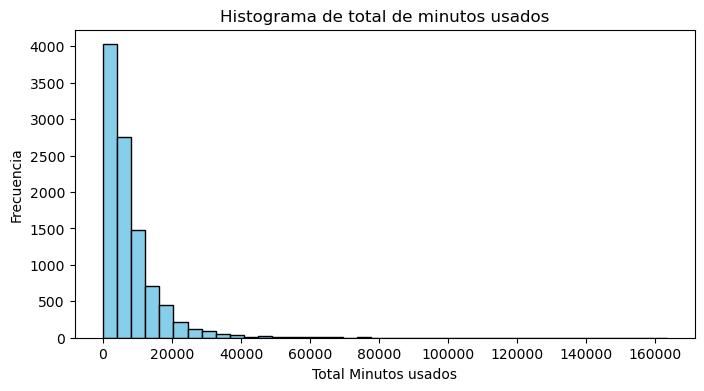

In [37]:
# Histograma para total minutos
plt.figure(figsize=(8, 4))
plt.hist(df_2['totmou'], bins=40,color='skyblue', edgecolor='black')
plt.xlabel('Total Minutos usados')
plt.ylabel('Frecuencia')
plt.title('Histograma de total de minutos usados')
plt.show()

##### Se observa que la gran mayoria de usuarios esta entre los 0 minutos y 29000 miniutos, se evidencian algunos datos anomalos son pocos pero puede generar errores a la hora de realizar algun modelo

C:\Users\mguerra\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


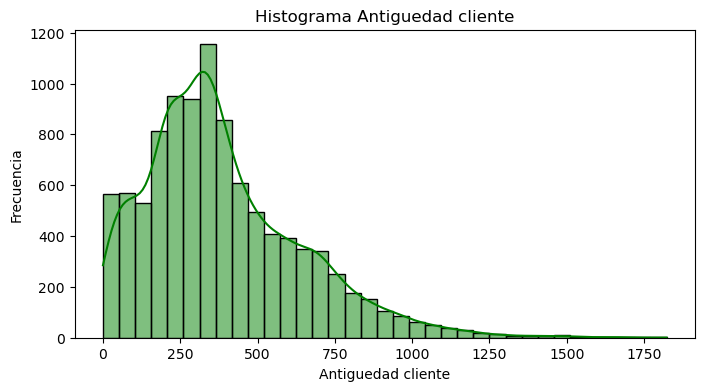

In [15]:

# Histograma para antiguedad
plt.figure(figsize=(8, 4))
sns.histplot(df_2['eqpdays'], bins=35,color='green', edgecolor='black', kde=True)
#plt.hist(df['totmou'], bins=40,color='green', edgecolor='black')
plt.xlabel('Antiguedad cliente')
plt.ylabel('Frecuencia')
plt.title('Histograma Antiguedad cliente')
plt.show()

##### En el caso de la antiguedad se muestra una distribucion mas normal, se ve que la gran mayoria estan entre la media de antiguedad

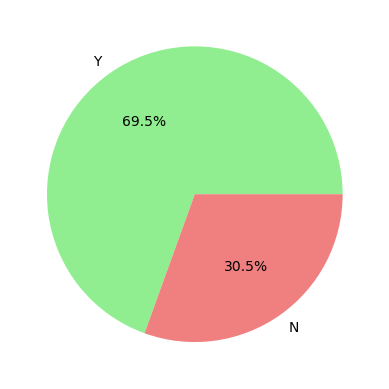

In [24]:

plt.pie(df_2['creditcd'].value_counts(), 
        labels=df_2['creditcd'].value_counts().index, 
        autopct='%1.1f%%', 
        colors=[ 'lightgreen', 'lightcoral'])
plt.show()

##### se observa que mas del 50 % de los usuarios poseen credito, pero tendra realcion poseer un credito segun su nivel de ingreso

##### Primero validemos la relacion entre los minutos y su ingreso

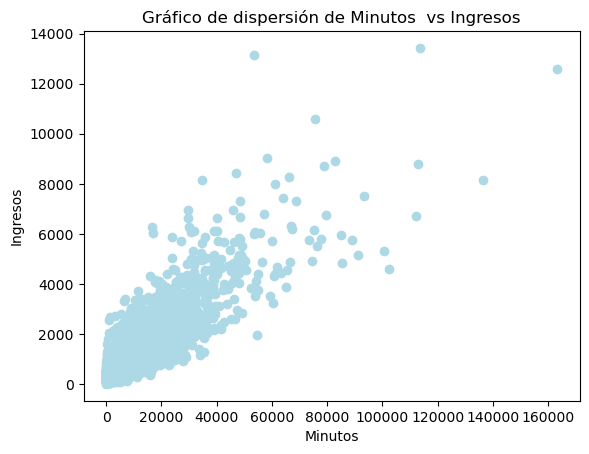

In [23]:
### Gráfico de dispersión

plt.scatter(df_2['totmou'], df_2['totrev'], color='lightblue')
plt.xlabel('Minutos')
plt.ylabel('Ingresos')
plt.title('Gráfico de dispersión de Minutos  vs Ingresos')
plt.show()

##### Se observa que hay una gran relacion entre los minutos a mayor minutos, sus ingresos son mayores, hay una relacion directamente proporcional

##### ahora veamos si tener un credito afecta la realcion ente estas dos variables

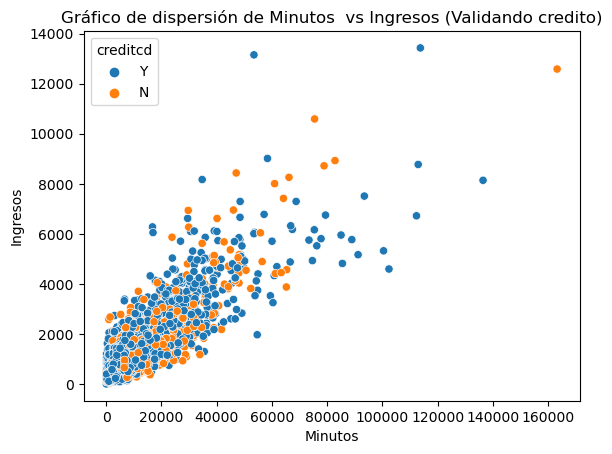

In [25]:
### Gráfico de dispersión

sns.scatterplot(data=df_2,x='totmou',y='totrev',hue='creditcd')
plt.xlabel('Minutos')
plt.ylabel('Ingresos')
plt.title('Gráfico de dispersión de Minutos  vs Ingresos (Validando credito)')
plt.show()

##### Como se observa la mayoria de usuario tiene creditos y esto es idependiente de que tenga o no ingresos alto o por los minutos,asi que no veo el credito afecte las variables ya que no se evidencia una segmentacion clara entre estas